# Bone Data

Here I want to start working on my bone dataset.
<br> I do not want to spend time describing each feature. 
<div align = 'right'>
    <font size=2>
        خب اولین کار اینه که من بیام و داده م رو توی این نون بوک لود کنم تا ببینم که چندتا فیچر دارم. این کار رو با پانداس انجام میدم
    </font>
    </div>

In [125]:
import pandas as pd
df = pd.read_excel('Bone_Data.xlsx')
df.head()

,Age (y),sex,Height (m),wight (kg),BMI,SOS,BUA,SI,BWC%,T1 (ms),...,MCH,MCHC,Platelets,FBS,Creatinine,Calcium. Ca,Phosphorus.P,TSH,Ferritin,Vit D
0,30.0,f,1.55,51,21.227888,1546,107,84,3.18,99.2500,...,28.0,32.8,279,84,0.63,9.4,3.60,2.40,30.0,60.0
1,39.7,f,1.60,72,28.125000,1543,115,89,4.22,143.9389,...,29.3,33.2,242,92,0.82,8.8,2.59,2.01,48.6,38.9
2,34.3,f,1.54,68,28.672626,1596,115,103,4.50,127.3443,...,31.3,33.4,166,107,0.68,9.4,3.40,2.60,28.7,67.3
3,35.3,f,1.60,64,25.315454,1600,116,105,4.01,123.8974,...,25.6,32.4,377,95,0.79,9.7,2.90,2.60,29.2,32.5
4,37.0,f,1.64,62,23.051755,1543,121,93,4.17,133.8113,...,29.7,34.5,256,87,0.80,9.2,3.80,3.10,21.3,57.0


In [126]:
df.shape

(50, 136)

In [127]:
df.columns

Index(['Age (y)', 'sex', 'Height (m)', 'wight (kg)', 'BMI', 'SOS', 'BUA', 'SI',
       'BWC%', 'T1 (ms)',
       ...
       'MCH', 'MCHC', 'Platelets', 'FBS', 'Creatinine', 'Calcium. Ca',
       'Phosphorus.P', 'TSH', 'Ferritin ', 'Vit D'],
      dtype='object', length=136)

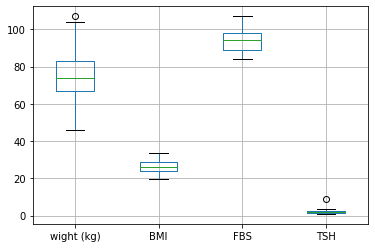

In [128]:
df.boxplot(column=['wight (kg)','BMI','FBS','TSH'])

<div align = 'right'>
    <font size=2.5>
        پس بر اساس این جدولی که الآن آپلود کردم، ۵۰ نفر در مطالعه ی من هستند و من از هر نفر ۱۳۶ تا پارامتر رو اندازه گرفته ام. یعنی ۱۳۶ تا فیچر دارم. 
        <br> حالا دو تا سوال مطرح می شود. 
        <br><b>سوال اول</b>
        <br>اینه که تو چه پارامتری رو می خوای پیش بینی کنی.؟
        <br>خب در حقیقت من می خوام کیفیت استخوان رو بررسی کنم که در این صورت مساله ی من یه مساله ی آن سوپر وایزد لرنینگ میشود. بنابراین من فک میکنم باید بریم به سراغ ری اینفورسمنت لرنینگ 
        <br> ولی خب من برای اینکه مساله رو ساده تر کنم فرض می کنم که می خوام سن رو پیش بینی کنم بنابراین مساله رو 
        به مساله ی سوپروایزد تبدیل می کنم
        <br><b>سوال دوم</b>
        <br> تعداد فیچر ها خیلی زیاده و مطمئن هستیم که تعداد زیادیشون اضافی هستند. بنابراین قدم اول این پروژه اینه که با یه متد فیچر سلکشن فیچر های خوب رو پیدا کنیم
        <br> اول دیتایی که داریم رو به صورت زیر تقسیم بندی می کنیم

In [129]:
bone_data = df.to_numpy()
data_unseen = bone_data[45:51,:]
data_set_4model = bone_data[:45,:]
print('Data put aside as unseen data: Size')
print(data_unseen.shape)
print('Data for train and test of the model: Size')
print(data_set_4model.shape)

Data put aside as unseen data: Size
(5, 136)
Data for train and test of the model: Size
(45, 136)


In [130]:
predictors = data_set_4model[:,1:136]
target = data_set_4model[:,0]
print('Number of Features (Predictors)')
print(predictors.shape[1])
print('We want to predict AGE')

Number of Features (Predictors)
135
We want to predict AGE


<div align = 'right'>
    <font size=2.5>
        در این مرحله یه مدل بسیار ساده رو همینطوری ران میکنیم تا ببینیم که این فیچر ها چطور عمل میکنند. الآن مساله ی من یه مساله ی رگرسیون هست و من با استفاده از دیپ لرنینگ می خوام یه مدل بسازم
        <br> 
        در این جا یه مدل میسازم با فقط یک لایه ی پنهان
        <br>
        <br> 
        راستی، قبل از ران کردن مدل باید داده هات رو درست و راست کنی
        یعنی داده هایی که به صورت عدد نیستند رو به عدد تبدیل کنی
        

In [131]:
for item in predictors:
    if item[0] is 'f':
        item[0] = 0
    else:
        item[0]=1

print(predictors[0:10,0])

[0 0 0 0 0 0 0 0 0 0]


In [132]:
from keras.models import Sequential
from keras.layers import Dense

n_col = predictors.shape[1]
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = (n_col,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

model.fit(predictors,target,validation_split=0.2,epochs=5)

Train on 36 samples, validate on 9 samples
Epoch 1/5
36/36 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/5
36/36 [==============================] - 0s 136us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/5
36/36 [==============================] - 0s 117us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/5
36/36 [==============================] - 0s 141us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/5
36/36 [==============================] - 0s 166us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00


<div align = 'right'>
    <font size=2.5>
        همه چیز باید ثبت بشه. بنابراین من این مدلی که الآن ران کردم رو عوض نمی کنم
        <br> در جواب می بینیم که مقدار های لاس و دقت هر دو نامعلوم هستند.
        <br> 
        تا دانش الآن من، این دوتا معنی می تونه داشته باشه. 
        <br>یکی اینکه داخل ورودی هات مقدار نامعلوم وجود داره
        <br>یا اینکه دلیلش اینه که من داده ها رو نرمالایز نکردم برادر من. یکیش توی محدوده ی صده یکیش توی محدوده ی زیر یکه

In [133]:
df.isnull().sum().sum()

3

In [134]:
nan_index = df.isnull().any(axis=1)
df[nan_index]

,Age (y),sex,Height (m),wight (kg),BMI,SOS,BUA,SI,BWC%,T1 (ms),...,MCH,MCHC,Platelets,FBS,Creatinine,Calcium. Ca,Phosphorus.P,TSH,Ferritin,Vit D
24,51.0,f,1.64,80,29.744200,1512,98,68,6.04,NaN,...,31.9,34.2,182,95,1.04,9.3,2.8,1.1,30.2,50.1
29,31.1,m,1.80,82,25.308642,1634,143,132,4.45,117.5090,...,29.9,35.6,272,91,1.08,9.8,2.8,1.7,126.8,15.1
45,50.9,m,1.81,85,25.945484,1577,140,116,5.71,179.2813,...,30.1,35.4,242,93,1.21,9.3,3.2,1.6,133.4,62.5


In [135]:
predictors[24]

array([0, 1.64, 80, 29.744199881023206, 1512, 98, 68, 6.04, nan,
       1464.5379782270606, 275.5445101088647, 1188.993468118196,
       1577.8487560555054, 1934.08, 372.1921340011495, 465.7108,
       1950.040890056655, 4.855, 9.375, 3.45, 221.06, 1.298, 4.85, 7.84,
       17.62, 30.31, 1.04, 3.44, 5.25, 17.49, 26.17, 0.52, 0.709, 0.669,
       0.993, 0.864, 0.501, -1.3, -0.3, -0.7, -0.6, -2.0, 84, 95, 90, 92,
       68, -0.5, 0.1, -0.4, -0.2, -0.6, 93, 102, 94, 98, 87, 12.34, 12.35,
       13.83, 15.92, 54.44, 10.73, 11.49, 11.82, 12.86, 46.91, 0.87,
       0.931, 0.855, 0.808, 0.862, -1.1, -0.9, -2.1, -2.3, -1.7, 88, 91,
       79, 76, 82, -0.4, -0.1, -1.3, -1.5, -0.9, 95, 99, 86, 83, 90, 3.56,
       5.32, 2.14, 11.02, 1.4, 3.09, 1.45, 5.94, 0.393, 0.581, 0.678,
       0.539, -0.9, -0.5, -0.3, -0.7, 89, 96, 98, 93, -0.3, 0.3, 0.5, 0.0,
       95, 103, 104, 100, 5.0, 4.3, 13.8, 40.3, 93.1, 31.9, 34.2, 182, 95,
       1.04, 9.3, 2.8, 1.1, 30.2, 50.1], dtype=object)

In [136]:
predictors.shape[1]

135

In [137]:
for i in range(0,135):
    if predictors[24,i] is np.nan:
        predictors[24,i] = 0
        
predictors[24]

array([0, 1.64, 80, 29.744199881023206, 1512, 98, 68, 6.04, nan,
       1464.5379782270606, 275.5445101088647, 1188.993468118196,
       1577.8487560555054, 1934.08, 372.1921340011495, 465.7108,
       1950.040890056655, 4.855, 9.375, 3.45, 221.06, 1.298, 4.85, 7.84,
       17.62, 30.31, 1.04, 3.44, 5.25, 17.49, 26.17, 0.52, 0.709, 0.669,
       0.993, 0.864, 0.501, -1.3, -0.3, -0.7, -0.6, -2.0, 84, 95, 90, 92,
       68, -0.5, 0.1, -0.4, -0.2, -0.6, 93, 102, 94, 98, 87, 12.34, 12.35,
       13.83, 15.92, 54.44, 10.73, 11.49, 11.82, 12.86, 46.91, 0.87,
       0.931, 0.855, 0.808, 0.862, -1.1, -0.9, -2.1, -2.3, -1.7, 88, 91,
       79, 76, 82, -0.4, -0.1, -1.3, -1.5, -0.9, 95, 99, 86, 83, 90, 3.56,
       5.32, 2.14, 11.02, 1.4, 3.09, 1.45, 5.94, 0.393, 0.581, 0.678,
       0.539, -0.9, -0.5, -0.3, -0.7, 89, 96, 98, 93, -0.3, 0.3, 0.5, 0.0,
       95, 103, 104, 100, 5.0, 4.3, 13.8, 40.3, 93.1, 31.9, 34.2, 182, 95,
       1.04, 9.3, 2.8, 1.1, 30.2, 50.1], dtype=object)

In [138]:
for i in range(0,135):
    if predictors[29,i] is np.nan:
        predictors[29,i] = 0
        

<div align = 'right'>
    <font size=2.5>
        <br>حالا که داده ها رو از وجود مقادیر نامعلوم پاک سازی کردیم یه بار دیگه دقیقا همون مدل رو ران میکنیم

In [139]:
model.fit(predictors,target,validation_split=0.1,epochs=5)

Train on 40 samples, validate on 5 samples
Epoch 1/5
40/40 [==============================] - 0s 142us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/5
40/40 [==============================] - 0s 136us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/5
40/40 [==============================] - 0s 157us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/5
40/40 [==============================] - 0s 146us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/5
40/40 [==============================] - 0s 188us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00


<div align = 'right'>
    <font size=2.5>
        <br> حالا میخوایم داده رو نرمالایز کنیم
        

In [160]:
import numpy as np
normalizer = lambda x: (x - np.mean(x))/(max(x) - min(x))
predictors_norm = np.empty([45,135])

for i in range(0,135):
    predictors_norm[:,i] = normalizer(predictors[:,i])

In [161]:
predictors_norm[:1]

array([[-0.4       , -0.32690058, -0.37449909, -0.36419079, -0.11350427,
        -0.26208113, -0.22481962, -0.43903382,         nan,  0.49188355,
         0.46343621,  0.24884144,  0.25592676,  0.24884144,  0.45084997,
         0.46343621,  0.48283463, -0.55211994, -0.32336077, -0.40892256,
                nan,  0.01196581, -0.23245325, -0.16414646, -0.38985798,
        -0.37239241,  0.42307692, -0.17772524, -0.11912393, -0.24729624,
        -0.2204674 ,  0.14767932, -0.09995573, -0.04688135, -0.08      ,
        -0.09802182,  0.05927128, -0.08436214,  0.02558923, -0.03306233,
        -0.05714286,  0.08148148, -0.0722963 ,  0.01777778, -0.02298851,
        -0.05185185,  0.08395062, -0.17777778, -0.0627451 , -0.02374687,
        -0.11737892, -0.0749354 , -0.15873016, -0.06872428, -0.07434343,
        -0.13846154, -0.08085676, -0.04738164,  0.12839169,  0.00752218,
         0.2179085 ,  0.08865722,  0.13664813,  0.23457854,  0.20722181,
         0.2984103 ,  0.22928739,  0.20790665,  0.1